In [25]:
#!unzip Background.zip

In [26]:
#!pip install scikit-image

In [27]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from skimage import data, color
from skimage.transform import resize
from sklearn.feature_extraction.image import PatchExtractor
from random import sample

# Generar Fondos

In [28]:
# Tomamos algunas imágenes de sklearn
imgs = ['text',
        'coins',
        'moon',
        'page',
        'clock',
        'immunohistochemistry',
        'chelsea',
        'coffee',
        'hubble_deep_field'
        ]

images = []
for name in imgs:
    img = getattr(data, name)()
    if len(img.shape) == 3 and img.shape[2] == 3:  # Chequeamos si la imagen es RGB
        img = color.rgb2gray(img)
    images.append(resize(img, (100,100)))

# Imagenes caseras adicionales
for i in range(47):
    filename = str(i)+'.jpg'
    img = plt.imread(filename)
    img = color.rgb2gray(img)
    images.append(resize(img, (100,100)))

In [29]:
## Visualización
#fig, ax = plt.subplots(4, 10, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))
#axes = ax.ravel()
#
#for i in range(len(images)):
#    axes[i].imshow(images[i], cmap='gray')
#    axes[i].axis('off')
#
#plt.tight_layout()

In [30]:
# Tamaño de las imágenes de rostros
size = (64, 64)
print(f'Image size: {size}')

Image size: (64, 64)


In [31]:
# Función para extraer porciones de una imagen
def extract_patches(img, N, scale=1.0, patch_size=size):
    # Calcula el tamaño del parche extraído basado en el factor de escala dado
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))

    # Inicializa un objeto PatchExtractor con el tamaño de parche calculado,
    # el número máximo de parches, y una semilla de estado aleatorio
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)

    # Extrae parches de la imagen dada
    # img[np.newaxis] se utiliza la entrada de PatchExtractor es un conjunto de imágenes
    patches = extractor.transform(img[np.newaxis])

    # Si el factor de escala no es 1, redimensiona cada parche extraído
    # al tamaño del parche original
    if scale != 1:
        patches = np.array([resize(patch, patch_size) for patch in patches])

    # Devuelve la lista de parches extraídos (y posiblemente redimensionados)
    return patches

In [32]:
# Extraemos las imágenes de fondo
negative_patches = np.vstack([extract_patches(im, 64, scale) for im in tqdm(images, desc='Procesando imágenes') for scale in [0.1,0.25,0.5,0.75,1]])
negative_patches.shape

Procesando imágenes: 100%|██████████| 56/56 [00:01<00:00, 39.54it/s]


(17920, 64, 64)

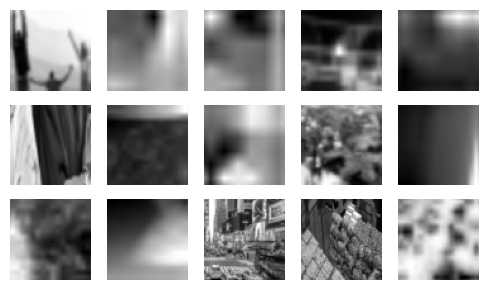

In [33]:
# Visualizamos una muestra
samples = sample(range(negative_patches.shape[0]), 15)
fig, ax = plt.subplots(3, 5, figsize=(5,3))
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[samples[i]], cmap='gray')
    axi.axis('off')
plt.tight_layout()
plt.show()

In [34]:
# Definir el nombre del directorio
output_dir = 'generated_patches'

# Crear el directorio si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Guardar las imágenes generadas
for i, patch in enumerate(negative_patches):
    # Convertir el parche a formato de imagen
    patch_img = Image.fromarray((patch * 255).astype(np.uint8))
    
    # Guardar la imagen en el directorio
    patch_img.save(os.path.join(output_dir, f'patch_{i:04d}.png'))

print(f'Se han guardado {len(negative_patches)} imágenes en el directorio {output_dir}')


Se han guardado 17920 imágenes en el directorio generated_patches
